### Open the input image

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
filename = "data/img4.raw"
img_size = [88421, 89133]  # img size is stored in the filename, but note that the order is reversed here
data_length = img_size[0] * img_size[1]
with open(filename, 'rb') as fid:
    img_original = np.fromfile(fid, np.uint8, data_length).reshape(img_size) 

In [3]:
image_full = img_original[0:img_size[0], 0:img_size[1]]
#img_plot = plt.imshow(image_full, cmap='gray', aspect='equal')
#plt.show()

### Step 1: resizing + edge detection

In [4]:
from skimage import io
from skimage.feature import canny

In [5]:
from skimage.transform import rescale
width = 1000
scale = width/img_size[0]
image_scaled = rescale(image_full, scale, multichannel=False, mode='constant', anti_aliasing=False)
edges = canny(image_scaled)
#io.imshow(edges)

##  Step 2: find all contours and selecting the largest one

Сontours can be discontinious, in these cases we need to apply a simple morphological operation

In [6]:
from skimage.morphology import dilation, disk

selem = disk(1)
edges = dilation(edges, selem)
#io.imshow(edges)

In [7]:
import cv2

# we need to convert image to uint to apply findContours
edges = (edges).astype(np.uint8)

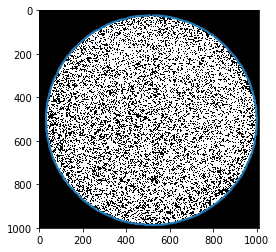

In [8]:
ext_contours = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

fig, ax = plt.subplots()
ax.imshow(edges, cmap=plt.cm.gray)

for n, contour in enumerate(ext_contours):
    contour = np.array(contour).squeeze() # we need to remove one dim, se below
    if contour.ndim > 1:
        ax.plot(contour[:, 0], contour[:, 1], linewidth=2)

For each contour we can calculate the Area and select the contour with the highest value

In [9]:
contour = max(ext_contours, key=cv2.contourArea)

# we need to remove one unnecessary dimension
print(contour.shape)
contour = contour.squeeze()
print(contour.shape)

(1487, 1, 2)
(1487, 2)


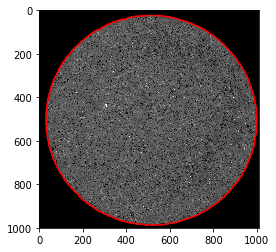

In [10]:
fig, ax = plt.subplots()
ax.imshow(image_scaled, cmap=plt.cm.gray)
ax.plot(contour[:, 0], contour[:,  1], 'r')

##  Step 3: find the morphological properties

In [11]:
def extrim_points(contour):
    x_list = []
    y_list = []
    for i in range(len(contour)):
        x_list.append(contour[i, 0])
        y_list.append(contour[i, 1])
    
    left_x = min(x_list)
    left_y = y_list[x_list.index(left_x)]
    coor_left = []
    coor_left.append(left_x)
    coor_left.append(left_y)
    
    right_x = max(x_list)
    right_y = y_list[x_list.index(left_x)]
    coor_right = []
    coor_right.append(right_x)
    coor_right.append(right_y)
    
    top_y = min(y_list)
    top_x = x_list[y_list.index(top_y)]
    coor_top = []
    coor_top.append(top_x)
    coor_top.append(top_y)
    
    bot_y = max(y_list)
    bot_x = x_list[y_list.index(top_y)]
    coor_bot = []
    coor_bot.append(bot_x)
    coor_bot.append(bot_y)
    
    return coor_left, coor_right, coor_top, coor_bot

In [12]:
coor_left_1, coor_right_1, coor_top_1, coor_bot_1 = extrim_points(contour)
print(coor_left_1, coor_right_1, coor_top_1, coor_bot_1)

[29, 517] [1001, 517] [507, 22] [507, 988]


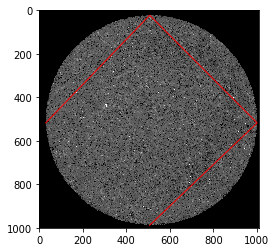

In [13]:
fig, ax = plt.subplots()
ax.imshow(image_scaled, cmap=plt.cm.gray)
ax.plot([coor_left_1[0], coor_top_1[0], coor_right_1[0], coor_bot_1[0]],
        [coor_left_1[1], coor_top_1[1], coor_right_1[1], coor_bot_1[1]], 
        'r', linewidth=1)

In [14]:
k_scale_1 = img_size[0]/width

##  Step 4: same operations for the labeled image

In [15]:
fname = 'data/img4_labels.png'
image_full_2 = io.imread(fname, as_gray=True, plugin='matplotlib')
#io.imshow(image_full_2)

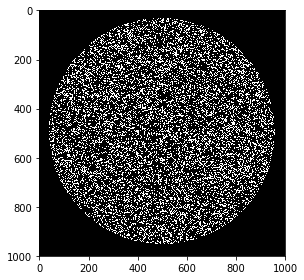

In [16]:
image_scaled_2 = rescale(image_full_2, width/4700, multichannel=False, mode='constant', anti_aliasing=False)
edges_2 = canny(image_scaled_2)
io.imshow(edges_2)

In [17]:
from skimage.morphology import dilation, disk

selem = disk(1)
edges_2 = dilation(edges_2, selem)
#io.imshow(edges_2)

In [18]:
edges_2 = (edges_2).astype(np.uint8)

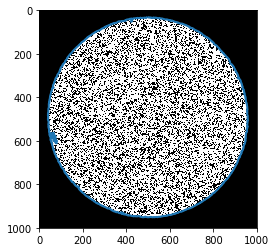

In [19]:
ext_contours_2 = cv2.findContours(edges_2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

fig, ax = plt.subplots()
ax.imshow(edges_2, cmap=plt.cm.gray)

for n, contour_2 in enumerate(ext_contours_2):
    contour_2 = np.array(contour_2).squeeze() # we need to remove one dim, se below
    if contour_2.ndim > 1:
        ax.plot(contour_2[:, 0], contour_2[:, 1], linewidth=2)

In [20]:
contour_2 = max(ext_contours_2, key=cv2.contourArea)

# we need to remove one unnecessary dimension
print(contour_2.shape)
contour_2 = contour_2.squeeze()
print(contour_2.shape)

(1637, 1, 2)
(1637, 2)


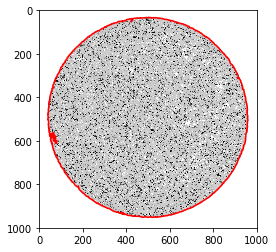

In [21]:
fig, ax = plt.subplots()
ax.imshow(image_scaled_2, cmap=plt.cm.gray)
ax.plot(contour_2[:, 0], contour_2[:,  1], 'r')

In [22]:
coor_left_2, coor_right_2, coor_top_2, coor_bot_2 = extrim_points(contour_2)
print(coor_left_2, coor_right_2, coor_top_2, coor_bot_2)

[39, 472] [958, 472] [494, 32] [494, 951]


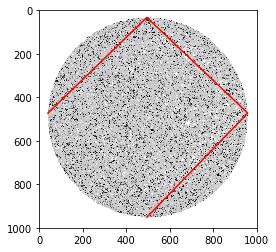

In [23]:
fig, ax = plt.subplots()
ax.imshow(image_scaled_2, cmap=plt.cm.gray)
ax.plot([coor_left_2[0], coor_top_2[0], coor_right_2[0], coor_bot_2[0]],
        [coor_left_2[1], coor_top_2[1], coor_right_2[1], coor_bot_2[1]], 'r')

In [24]:
k_scale_2 = 4700/width

## Step 5: find real edge lines of images

The input image

In [25]:
coor_left_1_true = np.array(coor_left_1) * k_scale_1
coor_right_1_true = np.array(coor_right_1) * k_scale_1
coor_top_1_true = np.array(coor_top_1) * k_scale_1
coor_bot_1_true = np.array(coor_bot_1) * k_scale_1

coor_left_1_true = coor_left_1_true + np.array([142, 0])
coor_right_1_true = coor_right_1_true + np.array([-23, 0])
coor_top_1_true = coor_top_1_true + np.array([0, 85])
coor_bot_1_true = coor_bot_1_true + np.array([0, -35])

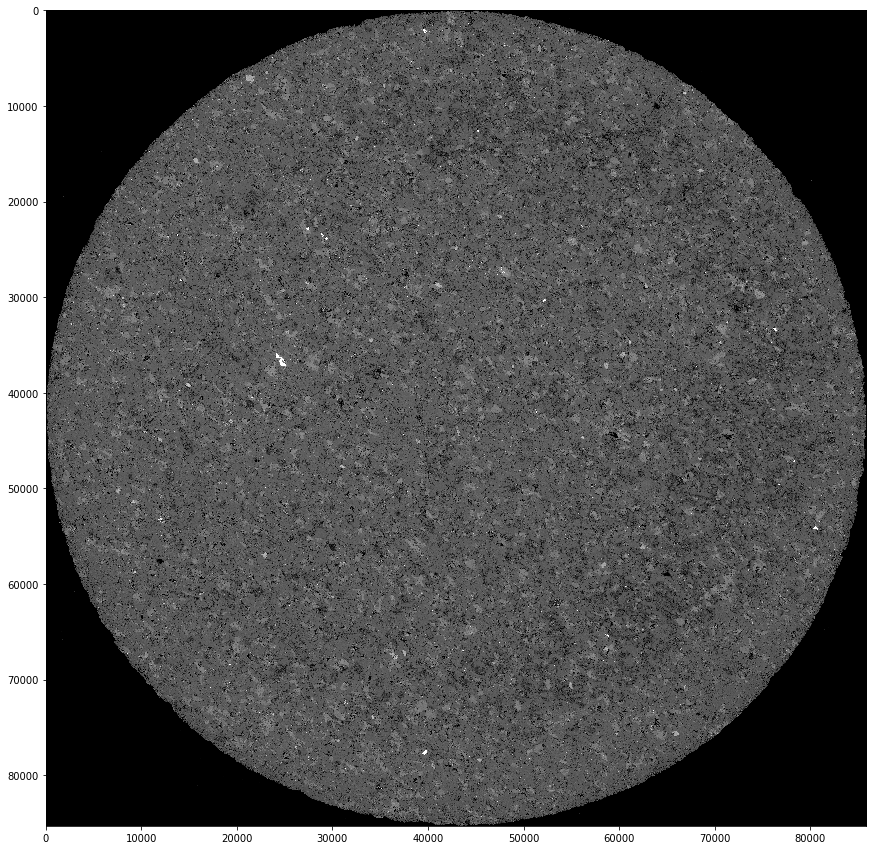

In [26]:
image_full_nospace_1 = image_full[int(coor_top_1_true[1]) : int(coor_bot_1_true[1]), 
                                  int(coor_left_1_true[0]) : int(coor_right_1_true[0])]
plt.figure(figsize=(15, 15))
plt.imshow(image_full_nospace_1, cmap=plt.cm.gray)

The labeled image

In [27]:
image_full_2 = cv2.imread(fname)
image_full_2 = cv2.cvtColor(image_full_2, cv2.COLOR_BGR2RGB)

In [28]:
coor_left_2_true = np.array(coor_left_2) * k_scale_2
coor_right_2_true = np.array(coor_right_2) * k_scale_2
coor_top_2_true = np.array(coor_top_2) * k_scale_2
coor_bot_2_true = np.array(coor_bot_2) * k_scale_2

coor_left_2_true = coor_left_2_true + np.array([7, 0])
coor_right_2_true = coor_right_2_true + np.array([0, 0])
coor_top_2_true = coor_top_2_true + np.array([0, 9])
coor_bot_2_true = coor_bot_2_true + np.array([0, 5])

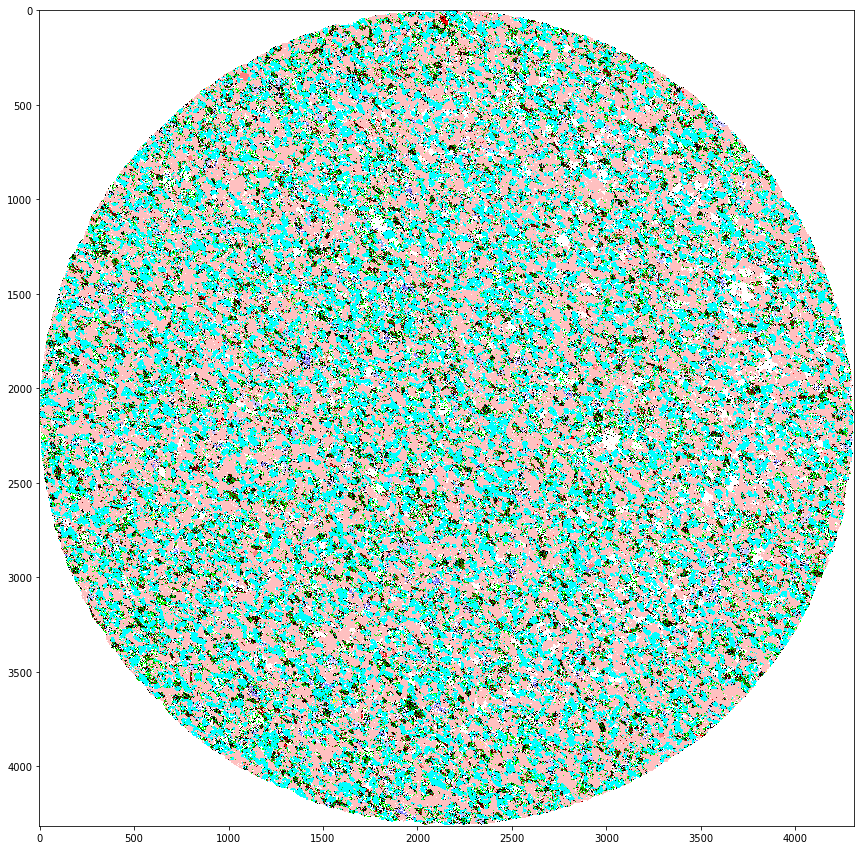

In [29]:
image_full_nospace_2 = image_full_2[int(coor_top_2_true[1]) : int(coor_bot_2_true[1]), 
                                    int(coor_left_2_true[0]): int(coor_right_2_true[0])]
plt.figure(figsize=(15, 15))
plt.imshow(image_full_nospace_2)

In [30]:
print(image_full_nospace_1.shape)
print(image_full_nospace_2.shape)

(85294, 85780)
(4315, 4312, 3)


## Step 6: rescale the input image

In [31]:
from skimage import util   
image_scaled_nospace_1 = util.img_as_ubyte(rescale(image_full_nospace_1, 4315 / 85294, 
                                                   multichannel=False, mode='constant', anti_aliasing=True))
image_scaled_nospace_1.shape

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(4315, 4340)

## Step 7: resize the labeled image

In [32]:
image_full_nospace_2_def = cv2.resize(image_full_nospace_2, (4340, 4315), interpolation=cv2.INTER_NEAREST)
image_full_nospace_2_def.shape

(4315, 4340, 3)

Let us find the center of the labeled image

In [33]:
center_x = (int(coor_left_2_true[0]) + int(coor_right_2_true[0]))/2
center_y = (int(coor_top_2_true[1]) + int(coor_bot_2_true[1]))/2

And then let us rotate it

In [34]:
def rotateImage(image, angle, center):
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_NEAREST, borderValue=(255,255,255))
    return result

In [35]:
image_full_nospace_2_def_rot = rotateImage(image = image_full_nospace_2_def, 
                                           angle = 0.48, center = tuple(np.array([center_x, center_y])))

In [36]:
image_scaled_nospace_1.shape

(4315, 4340)

## Step 8: check the results

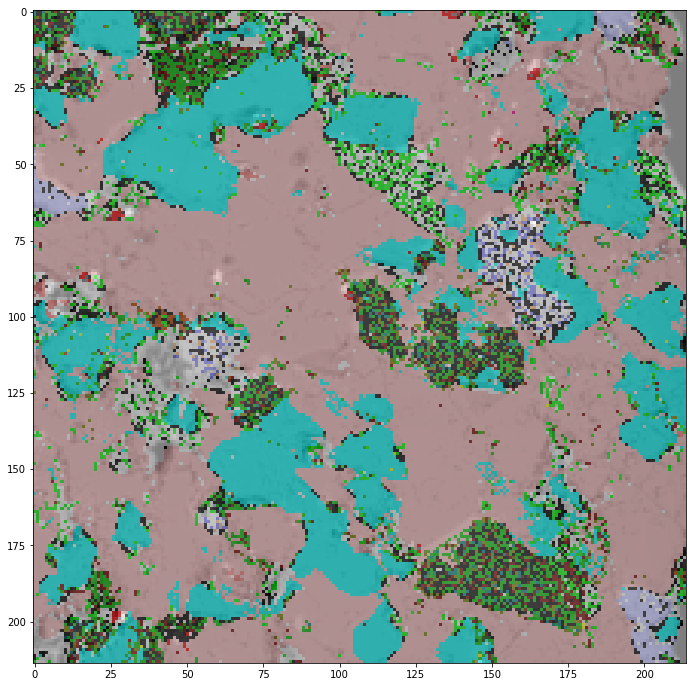

In [37]:
pos00 = np.array([31, 18])
hw = np.array([214, 214])

target_point = np.array([2000, 4100])

pos0 = pos00 + target_point
pos1 = pos0 + hw

input_image_crop = image_scaled_nospace_1[int(pos0[0]):int(pos1[0]), 
                                          int(pos0[1]):int(pos1[1])]
output_image_crop = image_full_nospace_2_def_rot[int(pos0[0]):int(pos1[0]), 
                                                 int(pos0[1]):int(pos1[1])]
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.imshow(input_image_crop, cmap='gray', aspect='equal')
ax.imshow(output_image_crop, aspect='equal', alpha=0.5)
plt.show()

You can see discrepancies in the image overlays, so we have abandoned this method of mapping image pairs

## Step 9: saving of the images

In [38]:
import imageio
from PIL import Image

In [151]:
pos00 = np.array([30, 17])
hw = np.array([214, 214])

target_point = np.array([0, 0])

pos0 = pos00 + target_point
pos1 = pos0 + hw

for i in range(20):
    for j in range(20):
        crop_in = image_scaled_nospace_1[int(pos0[0]) + int(hw[0] * i) : int(pos1[0]) + int(hw[0] * i), 
                                         int(pos0[1]) + int(hw[1] * j) : int(pos1[1]) + int(hw[1] * j)]
        crop_out = image_full_nospace_2_def_rot[int(pos0[0]) + int(hw[0] * i) : int(pos1[0]) + int(hw[0] * i), 
                                                int(pos0[1]) + int(hw[1] * j) : int(pos1[1]) + int(hw[1] * j)]
        im_in = crop_in
        track_in = 'C:/Users/vladislav.alekseev/Desktop/project (v.alekseev)/data/crops/in/'
        name = 'img4_r' + str(i) + '_c' + str(j) + '.png'
        name_in = track_in + name
        
        im_out = Image.fromarray(crop_out)
        track_out = 'C:/Users/vladislav.alekseev/Desktop/project (v.alekseev)/data/crops/out/'
        name_out = track_out + name
        
        imageio.imwrite(name_in, im_in)
        #im_out.save(name_out)

## Step 9: saving of random images

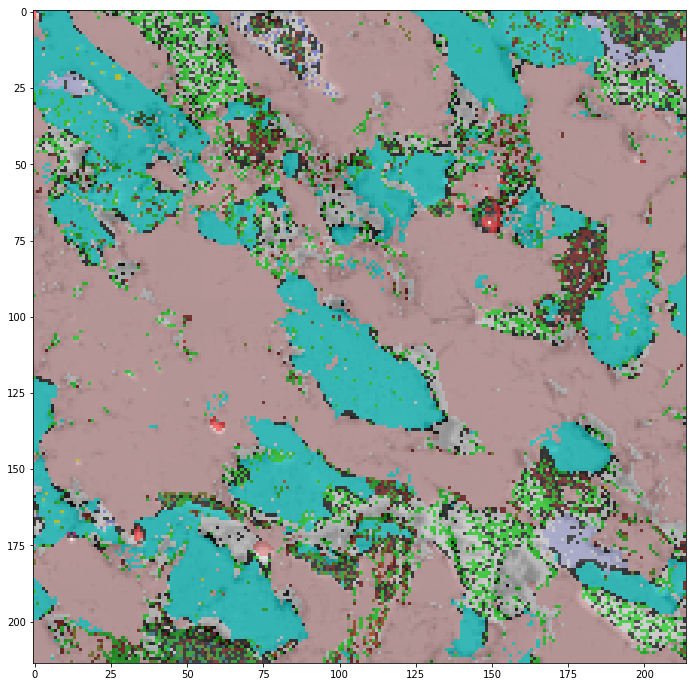

In [39]:
pos00 = np.array([0, 0])
hw = np.array([214, 214])

line = image_scaled_nospace_1.shape[::-1] - hw
target_y = int(line[0] * np.random.random())
target_x = int(line[1] * np.random.random())
target_point = np.array([target_y, target_x])

pos0 = pos00 + target_point
pos1 = pos0 + hw

input_image_crop = image_scaled_nospace_1[int(pos0[0]):int(pos1[0]), 
                                          int(pos0[1]):int(pos1[1])]
output_image_crop = image_full_nospace_2_def_rot[int(pos0[0]):int(pos1[0]), 
                                                 int(pos0[1]):int(pos1[1])]
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.imshow(input_image_crop, cmap='gray', aspect='equal')
ax.imshow(output_image_crop, aspect='equal', alpha=0.5)
plt.show()

In [40]:
pos00 = np.array([0, 0])
hw = np.array([214, 214])

line = image_scaled_nospace_1.shape[::-1] - hw

random_pos0 = []

for i in range(400):
    
    target_y = int(line[0] * np.random.random())
    target_x = int(line[1] * np.random.random())
    target_point = np.array([target_y, target_x])

    pos0 = pos00 + target_point
    pos1 = pos0 + hw
    random_pos0.append(pos0)
    
    crop_in = image_scaled_nospace_1[int(pos0[0]):int(pos1[0]), 
                                     int(pos0[1]):int(pos1[1])]
    crop_out = image_full_nospace_2_def_rot[int(pos0[0]):int(pos1[0]), 
                                            int(pos0[1]):int(pos1[1])]
    im_in = crop_in
    track_in = 'C:/Users/vladislav.alekseev/Desktop/project (v.alekseev)/data/crops/in_sgl_random/'
    name = 'img4_random' + str(i) + '.png'
    name_in = track_in + name
    
    im_out = Image.fromarray(crop_out)
    track_out = 'C:/Users/vladislav.alekseev/Desktop/project (v.alekseev)/data/crops/out_random/'
    name_out = track_out + name
    
    imageio.imwrite(name_in, im_in)
    im_out.save(name_out)

In [41]:
image_scaled_nospace_1 = util.img_as_ubyte(rescale(image_full_nospace_1, 4315 / 85294, 
                                                   multichannel=False, mode='constant', anti_aliasing=False))
image_scaled_nospace_1.shape

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(4315, 4340)

In [42]:
for i, pos0 in enumerate(random_pos0):

    pos1 = pos0 + hw
    crop_in = image_scaled_nospace_1[int(pos0[0]):int(pos1[0]), 
                                     int(pos0[1]):int(pos1[1])]
    im_in = crop_in
    track_in = 'C:/Users/vladislav.alekseev/Desktop/project (v.alekseev)/data/crops/in_random/'
    name = 'img4_random' + str(i) + '.png'
    name_in = track_in + name
    
    imageio.imwrite(name_in, im_in)